In [1]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.optimizers import Adam
from keras.utils import to_categorical
import keras
import keras.backend as tf

import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [2]:
batch_size = 32
num_classes = 10
epochs = 100

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


/home/tux/venv/lib/python3.7/site-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


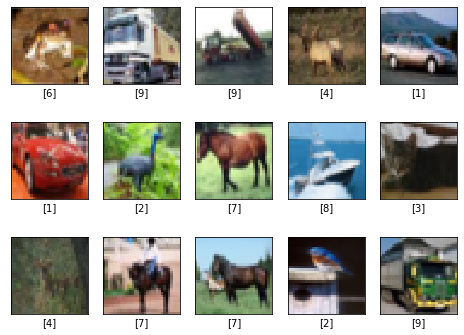

In [4]:
fig = plt.figure(figsize=(8, 6))

for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.set_xlabel(y_train[i])
    ax.imshow(x_train[i,:,:,:])

In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0
print(x_train.min(), x_train.max())
print(x_test.min(), x_test.max())

0.0 1.0
0.0 1.0


In [6]:
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
print(y_train[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [7]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=x_train.shape[1:],
                 padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='valid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                200768    
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)               

In [9]:
model.compile(loss = keras.losses.categorical_crossentropy,
              optimizer = Adam(),
              metrics = ['accuracy'])

In [10]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.3)

score = model.evaluate(x_test, y_test, verbose=0)
print('\n\nTest loss:', score[0])
print('Test accuracy:', score[1])

Train on 35000 samples, validate on 15000 samples
Epoch 1/100
35000/35000 [==============================] - 13s 364us/step - loss: 1.7904 - accuracy: 0.3383 - val_loss: 1.4527 - val_accuracy: 0.4994
Epoch 2/100
35000/35000 [==============================] - 13s 361us/step - loss: 1.4995 - accuracy: 0.4539 - val_loss: 1.3438 - val_accuracy: 0.5184
Epoch 3/100
35000/35000 [==============================] - 7s 212us/step - loss: 1.3717 - accuracy: 0.5044 - val_loss: 1.1981 - val_accuracy: 0.5880
Epoch 4/100
35000/35000 [==============================] - 10s 281us/step - loss: 1.3014 - accuracy: 0.5316 - val_loss: 1.1422 - val_accuracy: 0.6004
Epoch 5/100
35000/35000 [==============================] - 10s 296us/step - loss: 1.2370 - accuracy: 0.5535 - val_loss: 1.1297 - val_accuracy: 0.6008
Epoch 6/100
35000/35000 [==============================] - 9s 247us/step - loss: 1.1839 - accuracy: 0.5712 - val_loss: 1.0757 - val_accuracy: 0.6205
Epoch 7/100
35000/35000 [===========================

35000/35000 [==============================] - 7s 194us/step - loss: 0.5503 - accuracy: 0.7864 - val_loss: 1.2454 - val_accuracy: 0.6785
Epoch 56/100
35000/35000 [==============================] - 11s 310us/step - loss: 0.5474 - accuracy: 0.7866 - val_loss: 1.3129 - val_accuracy: 0.6760
Epoch 57/100
35000/35000 [==============================] - 8s 241us/step - loss: 0.5469 - accuracy: 0.7890 - val_loss: 1.2438 - val_accuracy: 0.6827
Epoch 58/100
35000/35000 [==============================] - 13s 362us/step - loss: 0.5415 - accuracy: 0.7893 - val_loss: 1.2556 - val_accuracy: 0.6783
Epoch 59/100
35000/35000 [==============================] - 9s 253us/step - loss: 0.5357 - accuracy: 0.7939 - val_loss: 1.2773 - val_accuracy: 0.6742
Epoch 60/100
35000/35000 [==============================] - 13s 365us/step - loss: 0.5283 - accuracy: 0.7954 - val_loss: 1.3419 - val_accuracy: 0.6809
Epoch 61/100
35000/35000 [==============================] - 12s 333us/step - loss: 0.5312 - accuracy: 0.7931 -

In [11]:
def plot_history(history):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

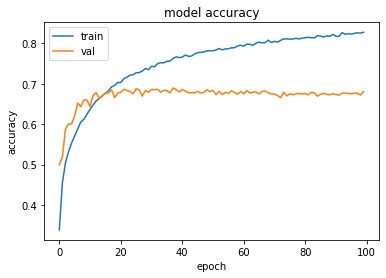

10000/10000 [==============================] - 1s 73us/step


Test loss: 1.6573439056396484
Test accuracy: 0.6801000237464905


In [12]:
plot_history(history)

score = model.evaluate(x_test, y_test, verbose=1)
print('\n\nTest loss:', score[0])
print('Test accuracy:', score[1])

In [14]:
model_file = 'simple_model_cifar10.h5'
model.save(model_file)